#Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import dataset from Google Drive

In [9]:
df =pd.read_excel("/content/drive/MyDrive/MASA_Hack/Travel_Ins.xlsx")
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [10]:
#Rename the column to remove spaces
df.rename(columns={ 'Agency Type':'Type', 'Distribution Channel':'Channel', 'Product Name':'Product','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

#EDA

In [13]:
##Separate the column into numerical and categorical 
numerical=['Duration','Net_Sales','Commision','Age']
categorical=['Agency','Type','Channel','Product','Claim','Destination','Gender']
df=df[numerical+categorical]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f009a86acd0>,
      dtype=object)

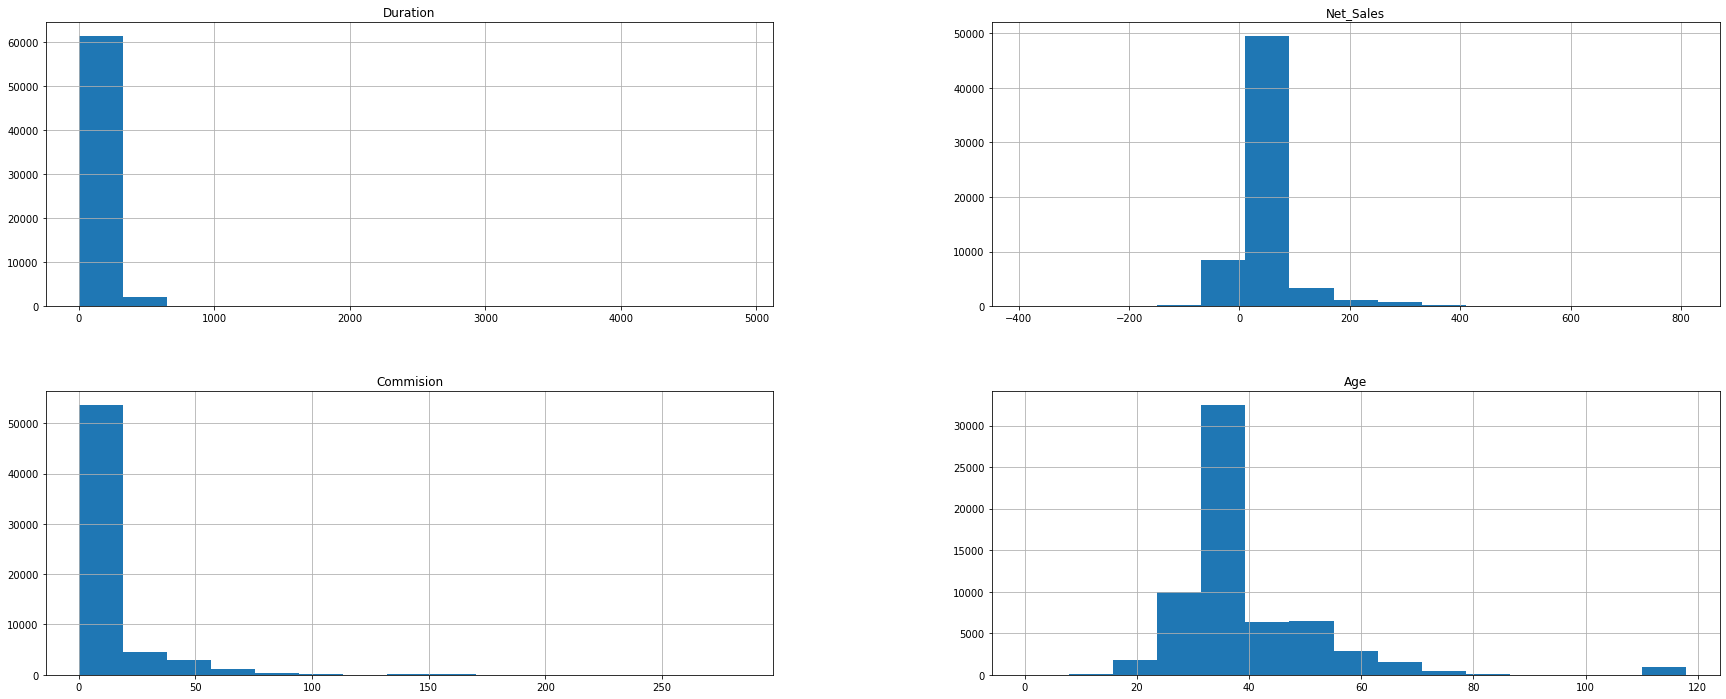

In [15]:
df[numerical].hist(bins=15, figsize=(30, 12), layout=(2, 2))

#Feature Selection

In [7]:
#Check the data type and non-null count for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Agency       63326 non-null  object 
 1   Type         63326 non-null  object 
 2   Channel      63326 non-null  object 
 3   Product      63326 non-null  object 
 4   Claim        63326 non-null  object 
 5   Duration     63326 non-null  int64  
 6   Destination  63326 non-null  object 
 7   Net_Sales    63326 non-null  float64
 8   Commision    63326 non-null  float64
 9   Gender       18219 non-null  object 
 10  Age          63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [8]:
#Drop gender column as we can cleary see there is too many missing values
df=df.drop(['Gender'], axis=1)
df

,Agency,Type,Channel,Product,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,63
